# Tarea Semana 07

# Kaled Sequeira
# Javier Fernández


## Procesamiento de señales

- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para la TS07.
- **Valor total 30 puntos**.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.

1. Importe una señal de audio __data_original_a3s.wav__ usando la función `wavfile.read()`. Note que esta señal contiene dos canales. **Valor: 1 punto** 

In [1]:
from scipy.io import wavfile
import numpy as np
import scipy as sp
from scipy.fft import *
import matplotlib.pyplot as plt
#from google.colab import drive
#drive.mount('/content/drive')

#Se copia el camino a seguir para ubicar el archivo en google drive
# path = "https://github.com/jjavierf64/FisicaComputacional/blob/main/TransformadaFourier/content/data_original_a3s.wav?raw=true"
path = "./content/data_noise_a3s.wav"

#Se lee el archivo usando wavfile.read() se almacena en señal_original
frecuencia, señal_original = wavfile.read(path)



2. La señal importada contiene valores en el rango $-2^{15}$ a $2^{15}$. Convierta la señal a valores en el intervalo $-1$ a $1$. **Valor: 1 punto**
3. Determine la frecuencia de muestreo de la señal (consulte la documentación de `wavfile.read()`) y calcule la duración de la señal. **Valor: 2 puntos**

In [2]:
#Se transforman los datos del tipo 32-bit integer PCM al tipo 32-bit floating-point
señal_original = señal_original.astype(np.float32) / 2**31
#Se determina la frecuencia de muestro de la señal así como su duración.
length = señal_original.shape[0] / frecuencia
print(f"duracion = {length} s")
print(f"frecuencia = {frecuencia} Hz")

duracion = 1.0332879818594105 s
frecuencia = 44100 Hz


4. Grafique la señal en función del tiempo: como la señal contiene dos canales, debe graficarse cada canal por separado. Grafique para toda la duración de la señal. **Valor: 4 puntos**

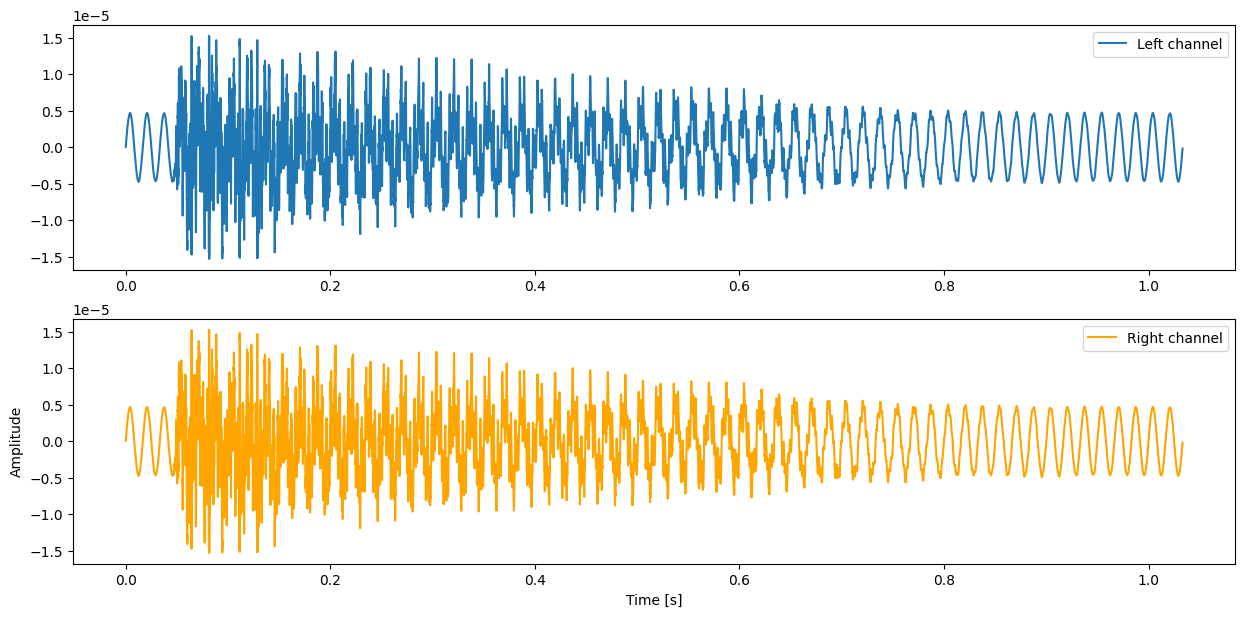

In [3]:
#Se grafica la señal original de ambos canales 
time = np.linspace(0., length, señal_original.shape[0])

fig,(ax,ax1) = plt.subplots(2,1,figsize=(15,7))
ax.plot(time, señal_original[:, 0], label="Left channel")
ax1.plot(time, señal_original[:, 1], label="Right channel",color="orange")
ax.legend()
ax1.legend()
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

5. Calcule la transformada  de Fourier de la señal de entrada mediante la función `scipy.fft.rfft()`. Esta función calcula la FFT de una señal _real_. Calcule la FFT solo el primer canal de la señal. **Valor: 1 punto**

In [4]:
# Se aplica la transformada rapida a la señal
señal_canal1=señal_original[:, 0]
transformada_señal = rfft(señal_canal1)

6. Grafique la parte real y la parte imaginaria de la FFT de la señal. **Valor: 4 puntos**

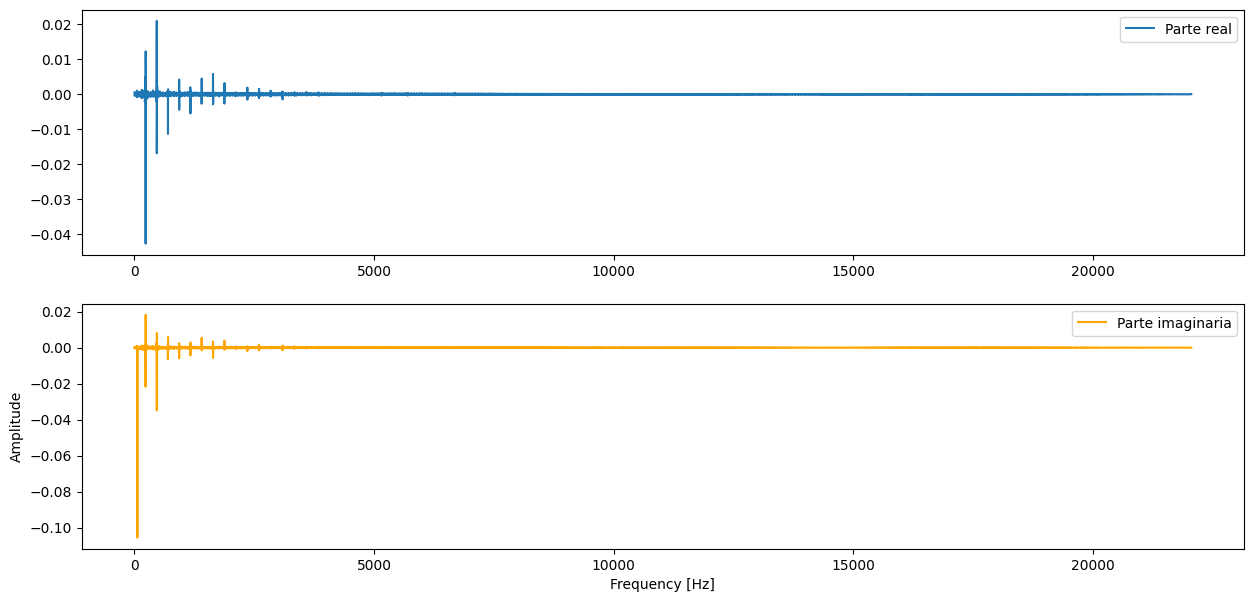

In [5]:
# Separar parte real de imaginaria
transformada_señal_real = transformada_señal.real
transformada_señal_imag = transformada_señal.imag

#Se grafica la señal transformada, su parte real e imaginaria 
N = int(frecuencia*length)
freq = rfftfreq(N, 1 / frecuencia)

fig,(ax,ax1) = plt.subplots(2,1,figsize=(15,7))
ax.plot(freq, transformada_señal_real, label="Parte real",)
ax1.plot(freq, transformada_señal_imag, label="Parte imaginaria",color="orange")
ax.legend()
ax1.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()

7. Ahora obtenga el valor absoluto de la transformada. Es decir, la intensidad para cada frecuencia. **Valor: 1 punto**
8. Grafique las intensidades en función de las frecuencias de la señal. Grafique para frecuencias en el intervalo de 0 Hz a 20000 Hz que es aproximadamente el rango de frecuencias que un ser humano puede escuchar. **Valor: 2 puntos**
9. Identifique las frecuencias principales detectadas y calcule el espaciamiento entre ellas. **Valor: 2 puntos**

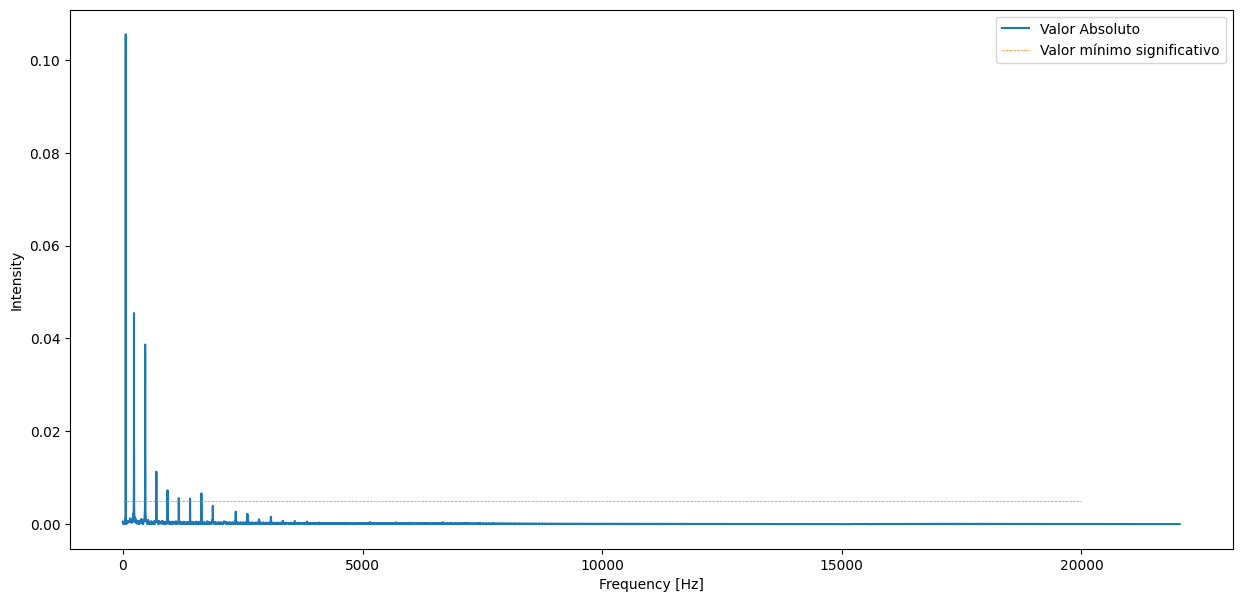

La frecuencia de 60.0 Hz tiene amplitud significativa de 0.10553 
La frecuencia de 228.4 Hz tiene amplitud significativa de 0.00598 
La frecuencia de 229.4 Hz tiene amplitud significativa de 0.00743 
La frecuencia de 230.3 Hz tiene amplitud significativa de 0.01042 
La frecuencia de 231.3 Hz tiene amplitud significativa de 0.02206 
La frecuencia de 232.3 Hz tiene amplitud significativa de 0.04548 
La frecuencia de 233.2 Hz tiene amplitud significativa de 0.02195 
La frecuencia de 234.2 Hz tiene amplitud significativa de 0.008 
La frecuencia de 463.6 Hz tiene amplitud significativa de 0.00606 
La frecuencia de 464.5 Hz tiene amplitud significativa de 0.02104 
La frecuencia de 465.5 Hz tiene amplitud significativa de 0.03869 
La frecuencia de 466.5 Hz tiene amplitud significativa de 0.01595 
La frecuencia de 467.4 Hz tiene amplitud significativa de 0.00835 
La frecuencia de 468.4 Hz tiene amplitud significativa de 0.00504 
La frecuencia de 697.8 Hz tiene amplitud significativa de 0.00641

In [6]:
#Valor absoluto de la transformada, intensidad para cada frecuencia
transformada_intensidad = np.sqrt(transformada_señal_imag**2 + transformada_señal_real**2)

#Gráfico de las intensidades de las frecuencias
N = int(frecuencia*length)
freq = rfftfreq(N, 1 / frecuencia)

fig,ax = plt.subplots(figsize=(15,7))
plt.plot(freq, transformada_intensidad, label="Valor Absoluto")
plt.plot([0,20000], [0.005,0.005], label="Valor mínimo significativo", lw=0.5, linestyle="dashed") # Se establece un valor mínimo significativo de intensidad en 0.005
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.show()

#Principales frecuencias 

for index,intensidad in enumerate(transformada_intensidad):
    if intensidad > 0.005: #looking at amplitudes of the spikes higher than 350 
        print('La frecuencia de {} Hz tiene amplitud significativa de {} '.format(np.round(freq[index],1),  np.round(intensidad,5)))


10. Ahora realice un filtrado de la señal. Note que uno de los picos de intensidad ocurre en la frecuencia $60$ Hz. Esta pico de intensidad corresponde a ruido causado por _elecric hum_ (https://en.wikipedia.org/wiki/Mains_hum). Elimine este pico asignandole una intensidad de cero. Elimine también las intenidades de las frecuencias que están fuera del rango que puede escuchar una persona. **Valor: 3 puntos**

In [7]:
# Eliminar frecuencia de 60 Hz y frecuencias por fuera del rango de escucha de 21 Hz a 20 000 Hz
# Y eliminar las frecuencias de intensidad menor a 0.005
nueva_señal_transformada = transformada_señal

for index,f in enumerate(freq):
    if f < 62 and f > 58:
        nueva_señal_transformada[index] = 0.0
        
    if f < 21 or f > 20000:
        nueva_señal_transformada[index] = 0.0

    if transformada_intensidad[index] < 0.005:
        nueva_señal_transformada[index] = 0.0


11. Calcule la transformada inversa de la señal filtrada usando la función `wavfile.write`. **Valor: 1 punto**
12. Escuche la señal original y la filtrada, y trate de identificar la diferencia entre ellas.

In [8]:
# Aplicar transformada inversa
nueva_señal = np.fft.irfft(nueva_señal_transformada)*2**15

wavfile.write("./content/señal_limpia.wav", frecuencia, nueva_señal)

"""
La señal filtrada carece del sonido grave de 60Hz de fondo. También se le ha quitado el ruido causado por el micrófono. Sin embargo, se ha reducido el volumen del audio en general, ya se escucha más bajo.
"""

'\nLa señal filtrada carece del sonido grave de 60Hz de fondo. También se le ha quitado el ruido causado por el micrófono. Sin embargo, se ha reducido el volumen del audio en general, ya se escucha más bajo.\n'

13. Busque en internet alguna otra señal de audio en formato `.wav`. Puede ser que sea una señal sencilla (una nota tocada por algún instrumento musical) o una señal compleja (un sonido con ruido por ejemplo) y realice un procesamiento para detectar las frecuencias principales y eliminar el ruido de la señal. **Valor: 8 puntos**

duracion = 2.377687074829932 s
frecuencia = 11025 Hz


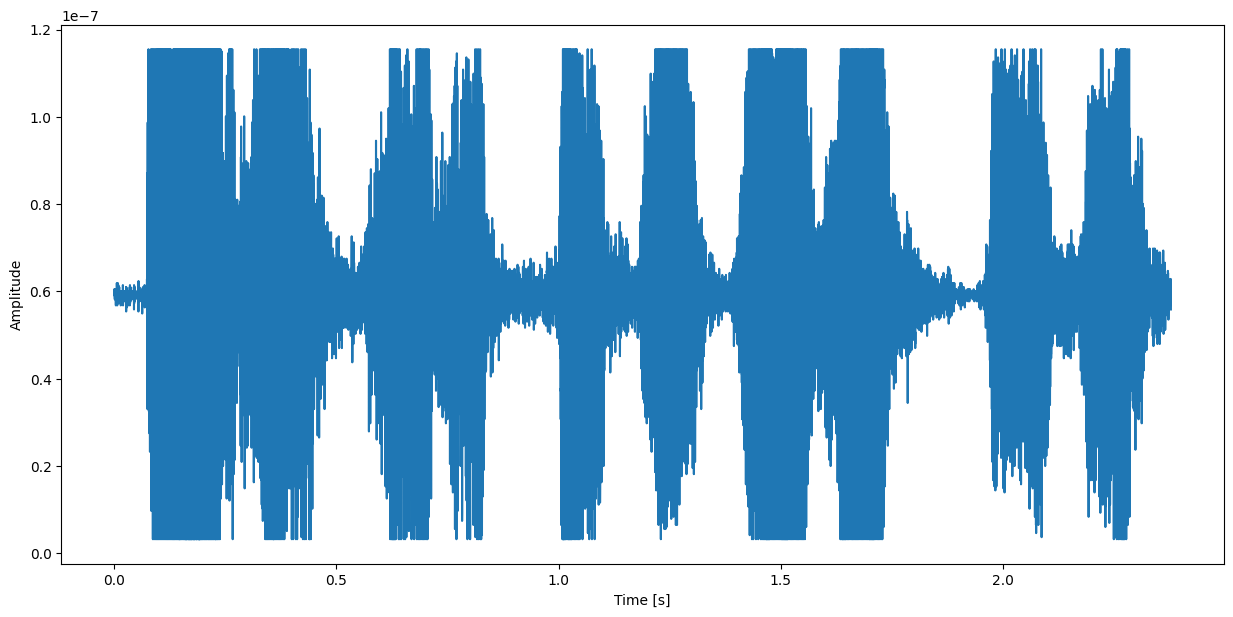

In [53]:
#Se realizan todos los pasos anteriores para un audio hallado en internet

path = "./content/english.wav"

#Se lee el archivo usando wavfile.read() se almacena en señal_original
frecuencia, señal_original = wavfile.read(path)

#Se transforman los datos del tipo 32-bit integer PCM al tipo 32-bit floating-point
señal_original = señal_original.astype(np.float32) / 2**31

#Se determina la frecuencia de muestro de la señal así como su duración.
length = señal_original.shape[0] / frecuencia
print(f"duracion = {length} s")
print(f"frecuencia = {frecuencia} Hz")

#Se grafica la señal original para un solo canal, ya que es MONO
time = np.linspace(0., length, señal_original.shape[0])

fig,ax = plt.subplots(figsize=(15,7))
plt.plot(time, señal_original)
plt.xlabel("Time [s]")
plt.ylabel("Amplitude")
plt.show()

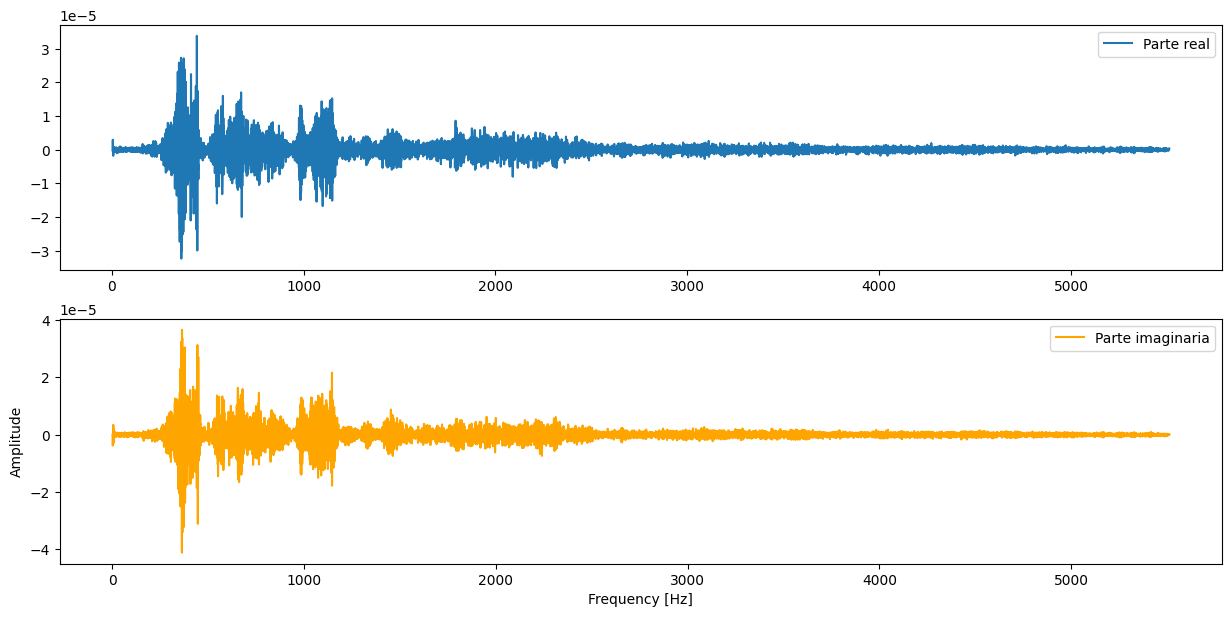

In [54]:
# Se pasa al espacio de las frecuencias

transformada_señal = rfft(señal_original)

# Separar parte real de imaginaria
transformada_señal_real = transformada_señal.real
transformada_señal_imag = transformada_señal.imag

#Se grafica la señal transformada, su parte real e imaginaria 
N = int(frecuencia*length)
freq = rfftfreq(N, 1 / frecuencia)

fig,(ax,ax1) = plt.subplots(2,1,figsize=(15,7))
ax.plot(freq[10:], transformada_señal_real[10:], label="Parte real",) # Se toma esta forma porque la parte de real presenta un dato problemático en las primeras frecuencias
ax1.plot(freq, transformada_señal_imag, label="Parte imaginaria",color="orange")
ax.legend()
ax1.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude")
plt.show()


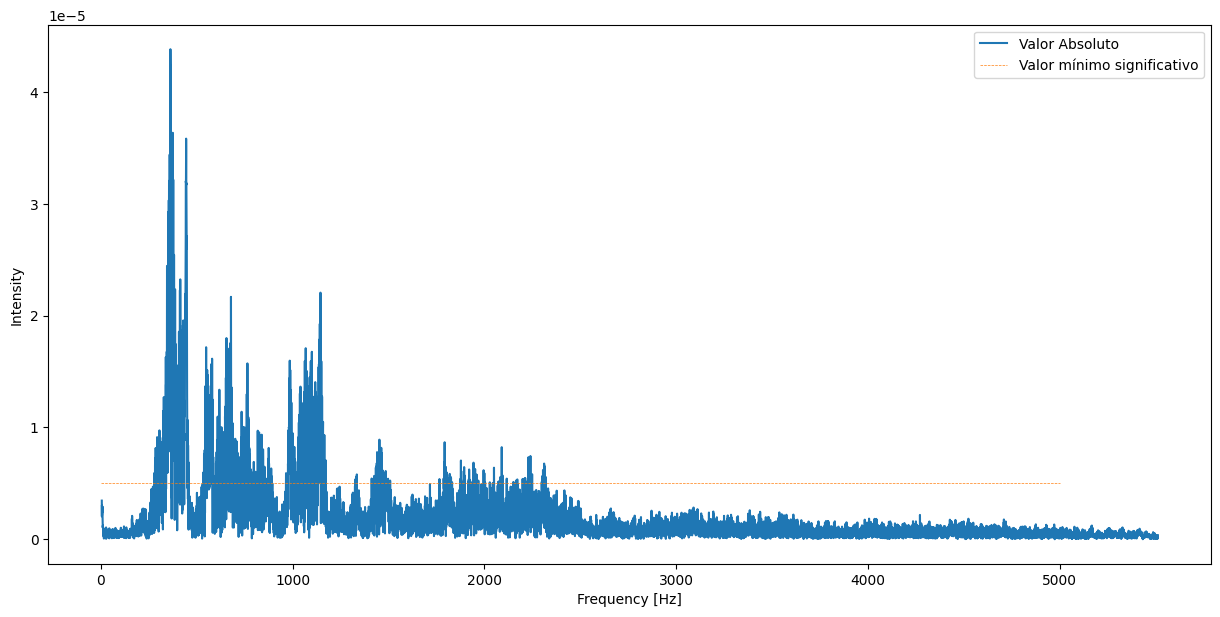

La frecuencia de 0.0 Hz tiene amplitud significativa de 0.0015525133 
La frecuencia de 278.8 Hz tiene amplitud significativa de 5.9357e-06 
La frecuencia de 279.7 Hz tiene amplitud significativa de 5.0982e-06 
La frecuencia de 281.4 Hz tiene amplitud significativa de 5.3137e-06 
La frecuencia de 281.8 Hz tiene amplitud significativa de 6.5259e-06 
La frecuencia de 282.2 Hz tiene amplitud significativa de 7.232e-06 
La frecuencia de 285.2 Hz tiene amplitud significativa de 8.1618e-06 
La frecuencia de 286.4 Hz tiene amplitud significativa de 5.1722e-06 
La frecuencia de 286.8 Hz tiene amplitud significativa de 5.0883e-06 
La frecuencia de 287.3 Hz tiene amplitud significativa de 8.0513e-06 
La frecuencia de 287.7 Hz tiene amplitud significativa de 5.4092e-06 
La frecuencia de 289.4 Hz tiene amplitud significativa de 6.5591e-06 
La frecuencia de 290.6 Hz tiene amplitud significativa de 6.7243e-06 
La frecuencia de 291.0 Hz tiene amplitud significativa de 7.3732e-06 
La frecuencia de 292.

In [55]:
#Valor absoluto de la transformada, intensidad para cada frecuencia
transformada_intensidad = np.sqrt(transformada_señal_imag**2 + transformada_señal_real**2)

#Gráfico de las intensidades de las frecuencias
N = int(frecuencia*length)
freq = rfftfreq(N, 1 / frecuencia)

fig,ax = plt.subplots(figsize=(15,7))
plt.plot(freq[10:], transformada_intensidad[10:], label="Valor Absoluto")
plt.plot([0,5000], [5*(10**-6),5*(10**-6)], label="Valor mínimo significativo", lw=0.5, linestyle="dashed") # Se establece un valor mínimo significativo de intensidad en 5*10^-6
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.show()

#Principales frecuencias 

for index,intensidad in enumerate(transformada_intensidad):
    if intensidad > 5*(10**-6): #looking at amplitudes of the spikes higher than 350 
        print('La frecuencia de {} Hz tiene amplitud significativa de {} '.format(np.round(freq[index],1),  np.round(intensidad,10)))

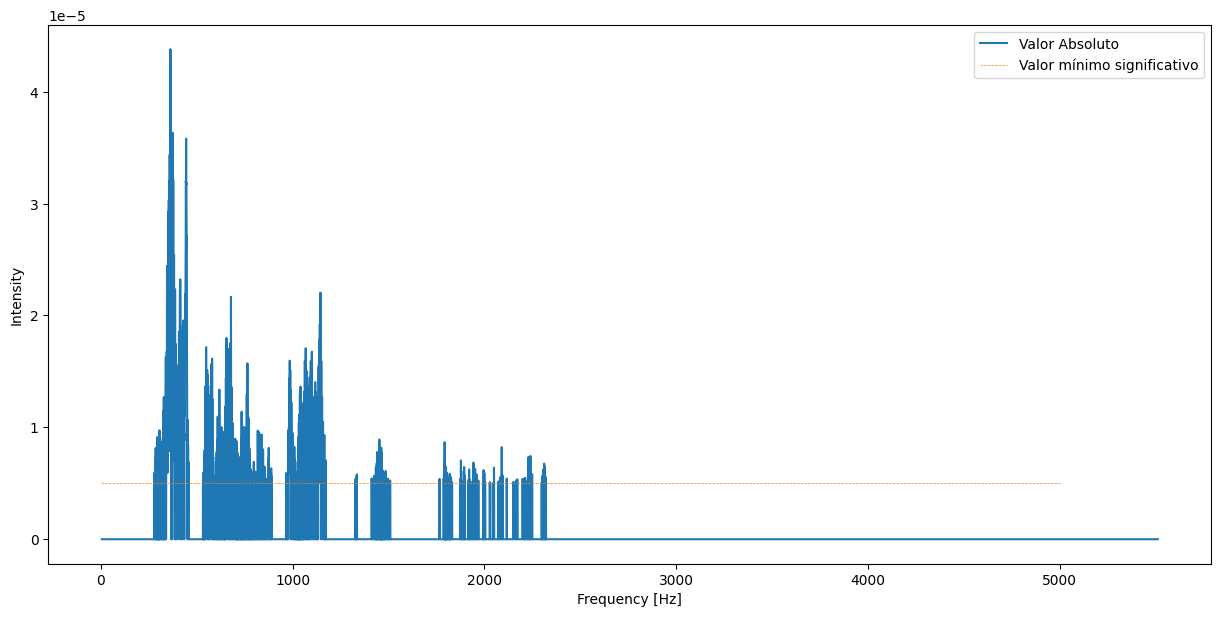

In [58]:
# Eliminar frecuencias por fuera del rango de escucha de 21 Hz a 20 000 Hz
# y las frecuencias de intensidad menor a 5* 10^-6
nueva_señal_transformada = transformada_señal

for index,f in enumerate(freq):        
    if f < 21 or f > 20000:
        nueva_señal_transformada[index] = 0.0

    if transformada_intensidad[index] < 5*(10**-6):
        nueva_señal_transformada[index] = 0.0


fig,ax = plt.subplots(figsize=(15,7))
plt.plot(freq[10:], np.abs(nueva_señal_transformada[10:]), label="Valor Absoluto")
plt.plot([0,5000], [5*(10**-6),5*(10**-6)], label="Valor mínimo significativo", lw=0.5, linestyle="dashed") # Se establece un valor mínimo significativo de intensidad en 5*10^-6
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Intensity")
plt.show()


In [57]:
# Aplicar transformada inversa
nueva_señal = np.fft.irfft(nueva_señal_transformada)*2**20

wavfile.write("./content/english_limpia.wav", frecuencia, nueva_señal)

A pesar de que se hallan reducido las frecuencias de menor intensidad, resulta un audio con problemas y poco limpio. Incluso, el volumen se reduce significativamente. Esto se debe a que el audio utilizado es bastante complejo, por lo que requiere de un proceso de reducción de ruido distinto al que se tiene.